# The Mechanics of TensorFlow

## Key Features of TensorFlow

1. TensorFlow givesus a scalable, mulitplatform programming interface for implementing and running machine learning algorithms.
2. TensorFlow API has been relatively stable and mature since its 1.0 release in 2n017.
3. Its ability to work with single or multiple GPUs, This allows users to train machine learning models very efficiently on  large-scale systems.
4. TensorFlow has strong growth drivers : development is funded ans supported nu Google, and  so continuous imporvements and contribution from open source developers.
5. TensorFlow support mobile deployment, which makes it a very suitable tool for application.

TensorFlow library lets users define operations and functions over tensors asn computational graphs. Tensors are a generalizable matehmatical notation for multidimensional arrays holding data vlaues, where the dimensionality of a tensor a typically referred to as its __rank__.

![Tensors image](tensors.png)

### Get the rank and shape of a tensor

We can use the _tf.rank_ function to get  the rank of a tensor. It is important to note that _tf.rank_ will return a tensor a soutpt, and in order to get the actual values, we will need to evaluate that tensor.
<br>

We can get the shape of a tensor _X_ using _X.get-shape()_, whichi will return an object of a special class called _TensorShape_.
<br>

We can print the shape and use it direclty ofr the shape argumen when creating other tensors, However, we can index only after converting it into a Python list , usign the _as-list_ method of the tensor class.


In [1]:
import tensorflow as tf
import numpy as np


In [5]:
g = tf.Graph()

## define the computation graph
with g.as_default():
    ## define tensors t1, t2, t3
    t1 = tf.constant(np.pi)
    t2 = tf.constant([1,2,3,4])
    t3 = tf.constant([[1,2], [3,4]])
    
    ## get their ranks
    r1 = tf.rank(t1)
    r2 = tf.rank(t2)
    r3 = tf.rank(t3)
    
    ## get their shapes
    s1 = t1.get_shape()
    s2 = t2.get_shape()
    s3 = t3.get_shape()
    print('Shapes:', s1, s2, s3)

Shapes: () (4,) (2, 2)


In [6]:
with tf.Session(graph=g) as sess:
    print('Ranks', sess.run(r1), sess.run(r2),sess.run(r3))
    print('Ranks', r1.eval(), r2.eval(),r3.eval())
    

Ranks 0 1 2
Ranks 0 1 2


###  Understanding TensorFlow's computation graph

TensorFlow relies on building a computatiion graph at tis core, and it uses this computation graph to derive relatinsips between tensor form input all the way to the ouput.

- The computation graph is simply a network of nodes. Each node resmebles an operation, which applies a function to its input tensor(s) and returns zeror or more tensors as output.


![computation graph ](computation_graph.png)

TensorFlow build this computation graph and uses it to compute the gradients accordingly. The individual steps for building and compiling such a computation graph in TensorFlow are as follows:

1. Instantiate a new, empty computation graph
2. Add nodes (tensors and operations) to the computation graph.
3. Execute the graph:<br>

    a. Start a new session<br>
    b. Initialize the varibales in the graph.<br>
    c. Run the computation graph in this session.
    
    
Let's create a graph for evaluationg _z = 2x(a-b)+c_

In [3]:
g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name='a_conts')
    b = tf.constant(2, name='b_conts')    
    c = tf.constant(3, name='c_conts')
    
    z = 2*(a-b) + c

- If we do __not__ explicitly create ag raph, there is always a default graph, and therfore, all the nodes are added to the default graph.
- A TensorFlow sesssion is an environment is which the opeations and tesnors ofa graph cna be exceuted A session object is crated nu calling _tf.session_ that can receive an existing graph (here, g) as an argument as in _tf.session(graph=g)_; otherwise, it will launch the efault frapht,, which might be empty.

<br>
- Evaluating each tensor involves calling its _eval_ method inside the current session, 
- When evaluating a specific tensor in the graph, TensorFlow has to execute all the preceding nodes in the graph until it reaches that particular one.
- In case there are one or more placeholders, they would need to  be fed.

In [4]:
with tf.Session(graph=g) as sess:
    print('2*(a-b)+c  =>', z.eval())

2*(a-b)+c  => 1


### Placeholders in TensorFlow

- TensorFlow has specil mechnaisms for feeding data, ON e of these mechanisms is the use of placeholder, whicha re predfiened tensors with specific types and shapes.

- These tensors are added to the computation graph using the _tf.placeholder_ functin, and they do not contain any data. However, upon the excution of certain nodes in the graph, these placholders need to be fed with data arrays.

### Defining placeholders

- When defining placeholders, we need to decide what their __shape and type__ should be , according to the shape and type of the data that will be fed through them upon execution.



In [13]:
g = tf.Graph()

with g.as_default():
    tf_a = tf.placeholder(shape=(None), dtype= tf.float16, name='a_pla_holde')
    tf_b = tf.placeholder(shape=(None), dtype= tf.float16, name='b_pla_holde')    
    tf_c = tf.placeholder(shape=(None), dtype= tf.float16, name='c_pla_holde')
    
    z = 2*(tf_a-tf_b)+tf_c

In [15]:
with tf.Session(graph=g) as sess:
    feed = {tf_a:1,
           tf_b:2,
           tf_c:3}
    print('z : ', sess.run(z, feed_dict=feed))
    
    feed = {tf_a:[1,2],
           tf_b:[3,2],
           tf_c:[4,3]}
    print('z : ', sess.run(z, feed_dict=feed))
    
    feed = {tf_a:[[1],[2]],
           tf_b:[[3],[2]],
           tf_c:[[4],[3]]}
    print('z : ', sess.run(z, feed_dict=feed))

z :  1.0
z :  [ 0.  3.]
z :  [[ 0.]
 [ 3.]]


A useful feaute of placeholders is that we can spcify _None_ for the dimension that is varying in size. For example, we cna create a placeholder of rank2, where hte firest dimension is unkonwn (or may vary),

In [16]:
g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(tf.float32, shape=[None,2], name='tf_x')
    x_mean = tf.reduce_mean(tf_x , axis=0, name='mean')

In [20]:
np.random.seed(123)
np.set_printoptions(precision=2)

with tf.Session(graph=g) as sess:
    x1 = np.random.uniform(low= 0, high=1, size=(5,2))
    
    print('Feeding data with shape ' , x1.shape)
    print('Result : ',sess.run(x_mean, feed_dict={tf_x:x1}))
    print(tf_x)    
    
    print('\n')
    x2 = np.random.uniform(low= 0, high=1, size=(10,2))
    
    print('Feeding data with shape ', x2.shape)
    print('Result : ',sess.run(x_mean, feed_dict={tf_x:x2}))
    print(tf_x)    


Feeding data with shape  (5, 2)
Result :  [ 0.62  0.47]
Tensor("tf_x:0", shape=(?, 2), dtype=float32)


Feeding data with shape  (10, 2)
Result :  [ 0.46  0.49]
Tensor("tf_x:0", shape=(?, 2), dtype=float32)


### Variables in TensorFlow

- __Variables__ are a special type of tensor objects that allow us to __store and update the parameters__ of our models in a TensorFflow session during tarining. 

### Defining Variables

- TensorFlow variables sotre the paramets of a models that can be update during training, for example, the weights in thei inpt, hidden, and output layers of a neural network. 

TensorFlow provies two ways of defining variables:

- tf.Variables({initial-value}, name='variable-name')
- tf.get_variables(name, ...)


The first one, _ tf.Variable _ , is a __class__ that ___creates an object for a new varibale and adds it to the graph.___ Note that tf.Variable does not have an explicity way to determine _shape_ and _dtype_; the shape and type are set to be the same sas those of the initial values.

The second option, tf.get_variable , can be used to __reuse__ and _existing variable with a given name_ (if the name exist in the graph) or create a new one  if the name does not exist. In this case the name becomes cricitcal; that's probably why it has to be places as the first argument to this function. Furthermore, tf.get_variable provides an explicty way to set _shape_ and _dtype_; these paramets are only required when creating anew Variable, not reusing exsting ones.

- the advantage of tf.get_variable over tf.Variable is twofold: tf.get_variable allows us to reuse exsting variables it already uses the popular Xavier/Glorot initializaiton scheme by default.


### Initializing Variables

Here, it is critical to understand that tensors defined as variables are not allocated in memoryt and contain no values until they are initialized. Therefore, before executing any node in the computation graph , we must initialzie the variables that are within .the path  to the node that we want ot execute.

The initialization process refers to allocaitong memory fro the assocaitaed tensors and assigning their intial values. TensorFlow provies a function names <bold> tf.global_varaibles_initializer </bold> that returns an operator for initalizing all the variables that exis in a computation graph. then, executing this operato rwill initialize the variables as follows:



In [7]:
g1 = tf.Graph()

with g1.as_default():
    w = tf.Variable(np.array([[1,2,3,4],
                             [5,6,7,8]]), name='w')
    print(w)

with tf.Session(graph=g1) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w))


<tf.Variable 'w:0' shape=(2, 4) dtype=int64_ref>
[[1 2 3 4]
 [5 6 7 8]]


In [8]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(1, name='w1')
    init_op = tf.global_variables_initializer()
    
    ## all the variable declaration must be before tf.global_variables_initializer() in the graph
    w2 = tf.Variable(2, name='w2')
    
with tf.Session(graph=g2) as sess:
    sess.run(init_op)
    
    ##  Throws the error as below  == Attempting to use unitialized values w2
    print('w2:', sess.run(w2))

FailedPreconditionError: Attempting to use uninitialized value w2
	 [[Node: _retval_w2_0_0 = _Retval[T=DT_INT32, index=0, _device="/job:localhost/replica:0/task:0/cpu:0"](w2)]]

### Variable Scope

Especially useful if we are constructing large neural network graphs.

- With Variable scopes, we can organize the variables into separate subparts. __When we create a variable scope, the name of operations and tensors that are created within that scope are prefixed with that scope__, and those scopes can further be nested. For example, if we have two subnetworks, where each subnetwork has several layers, we can define two scopes named _ 'net-A' _ and _ 'net-B' _  respectively, Then each layer will be defined within one of these scopes. 

In [12]:
g = tf.Graph()

with g.as_default():
    with tf.variable_scope('net_A'):
        with tf.variable_scope('layer-1'):
            w1 = tf.Variable(tf.random_normal(shape= (10,4)), name='weights')
        with tf.variable_scope('layer-2'):
            w2 = tf.Variable(tf.random_normal(shape= (20,10)), name='weights')
    with tf.variable_scope('net_B'):
        with tf.variable_scope('layer-1'):
            w3 = tf.Variable(tf.random_normal(shape= (10,4), name='weights'))
    print(w1)
    print(w2)
    print(w3)

<tf.Variable 'net_A/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>
<tf.Variable 'net_A/layer-2/weights:0' shape=(20, 10) dtype=float32_ref>
<tf.Variable 'net_B/layer-1/Variable:0' shape=(10, 4) dtype=float32_ref>


__Note:__ The Variable names are now prefixed with their nested scopes separated by the forward slash(/) symbol.

### Reusing Variables

Let's imagine that we're develping a somewhat complex neural network model that has a classifier whose input data comes from more than one source. For example, we'll assume that we have data ($X_A, y_A$) coming from source _ A _ and data ($X_B, y_B$) comes from source _ B _ . 

In this example, we will desing our graph in such a way that it will use the data from only one source as input tensor to build the network . Then, we can feed the data from the other source to the same classifier.

In the following example, we assume the data from source A is fed through placeholder, and __ source B is the output of a generator network which we will build by calling the _ build-generator _  function within the _generator_ scope. __ then we will add a classifier by calling _ build-classifier _  within the _ classifier _ scope. 

In [5]:
import tensorflow as tf

###############################
#    Helper functions         #
###############################


def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    weigths = tf.get_variable(name='weights', shape=(data_shape[1], n_classes), dtype=tf.float32)
    bias = tf.get_variable(name='bias', initializer = tf.zeros(shape=n_classes))
    logits = tf.add(tf.matmul(data, weigths), bias, name='logits')
    return logits, tf.nn.softmax(logits)


def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(tf.random_normal(shape = (data_shape[1], n_hidden)), name='w1')
    b1 = tf.Variable(tf.zeros(shape = (n_hidden)), name='b1')
    hidden = tf.add(tf.matmul(data, w1), b1, name='hidden_pre-activation')
    hidden = tf.nn.relu(hidden, 'hidden-activation')
    
    w2 = tf.Variable(tf.random_normal(shape = (n_hidden, data_shape[1])), name='w2')
    b2 = tf.Variable(tf.zeros(shape = (data_shape[1])), name='b2')
    output = tf.add(tf.matmul(hidden, w2), b2, name='output')
    return output, tf.nn.sigmoid(output)


################################
#       Build the graph        #
################################


batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape= (batch_size, 100), dtype=tf.float32, name='tf_X')

    ## build the geneartor
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)    
        
    ## build the classifier
    with tf.variable_scope('classifier') as scope:
        ## classifier for the original data
        cls_out1 = build_classifier(data = tf_X, labels=tf.ones(shape=batch_size))
        
        
        ## reuse the classifier for generated data
        scope.reuse_variables()
        cls_out2 = build_classifier(data= gen_out1[1], labels=tf.zeros(shape=batch_size))
    

__Note__ we have called the _build-classifier_ function two times. <br>

The first call causes the building of the network. Then, we call _scope.reuse_variables()_ and call the function again. As a result, the second call does not create new variables;; instead, it resues the same variables. akterbatuvekym we ciykd reuse the variables by specifying the _reuse=True_ parameter, as follows:

In [7]:
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size,100), dtype=tf.float32, name='tf_X')
    
    ## build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)
        
    ## build the classifier
    with tf.variable_scope('classifier'):
        ## classifier for the original data:
        cls_out1 = build_classifier(tf_X , labels =tf.ones(shape=batch_size))
        
    with tf.variable_scope('classifier', reuse=True):
        ## reuse the classifier for generated data
        cls_out2 = build_classifier(gen_out1[1] , labels =tf.zeros(shape=batch_size))
        

## Building a regression model


Since we've explored placeholders and variables, let's build an exampe model for regression analysis. With goal to implement a linear regression model : $ y^{`} = wx + b$

For training the model, we need to formulate a cost funciton. Here, we use the __Mean Squared Error (MSE)__ cost funciton that we defined as :


<center>$ \frac{1}{n} \sum_{i=1}^{n}  =   ( y^{(i)} - y^{`(i)} )^2 $</center>

In [84]:
g = tf.Graph()

with g.as_default():
    tf.set_random_seed(123)
    
    
    ## placeholder
    tf_X = tf.placeholder(dtype= tf.float32, shape=(None), name='input_X')
    tf_y = tf.placeholder(dtype= tf.float32, shape=(None), name='y_X')
    
    ## Defind the variable(model parameters)
    w = tf.Variable(initial_value=tf.random_normal(shape=(1,1), stddev=0.25), name='weight')
    b = tf.Variable(initial_value=0.0, name='bias')
    
    # build the model
    y_hat = tf.add(w*tf_X, b, name='y_hat')
    
    ## compute the cost
    cost = tf.reduce_mean(tf.square(tf_y - y_hat), name='cost_def')
    
    #train the model
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    
    train_op = optim.minimize(cost, name='train_operation')


Let's create a random regression data with one feature (one feature so we can plot it)

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

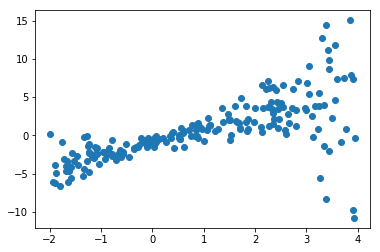

In [52]:
def make_random_data():
    X = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for t in X:
        r = np.random.normal(loc=0.0, scale=(0.5 + t*t/3), size=None)
        y.append(r)
    return X, 1.726*X - 0.84 + np.array(y)

x, y = make_random_data()

plt.plot(x, y, 'o')
plt.show()

In [65]:
## Let's traing the model

X_train, y_train  = x[:100], y[:100]
X_test, y_test  = x[100:], y[100:]

n_epochs = 500
training_costs = []

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        c, _ = sess.run([cost, train_op], feed_dict={tf_X: X_train, tf_y: y_train})
        training_costs.append(c)
        
        if epoch%50 == 0:
            print('Training cost %4d: %.2f' %(epoch, c) )
    

Training cost    0: 17.88
Training cost   50: 13.47
Training cost  100: 11.70
Training cost  150: 10.95
Training cost  200: 10.62
Training cost  250: 10.45
Training cost  300: 10.35
Training cost  350: 10.28
Training cost  400: 10.23
Training cost  450: 10.19


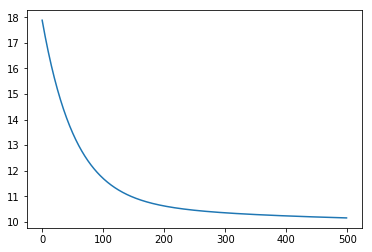

In [66]:
plt.plot(training_costs)

### Executing objects in a tensorFlow graph using their names

Executing variables and operators by their names is very useful in many scenarios. For example, we may develop a model in a seprate module; and thus the variables are not available in a different Python scope accroding ot Python scoping rules. However, iff we have a graph, we can execute the nodes off the graph using their names in the graph.



In [72]:
n_epochs = 500
training_costs = []

with tf.Session(graph=g) as sess:
    ## first , run the variables initializser
    sess.run(tf.global_variables_initializer())
    
    ## train the model for n_epochs
    for e in range(n_epochs):
        ## executing by Name
        c , _ = sess.run(['cost_def:0', 'train_operation'], feed_dict={'input_X:0': X_train, 'y_X:0': y_train})
        training_costs.append(c)
        
        if e%50 == 0:
            print('Epoch {:4d}  : {:.4f}'.format(e,c))

Epoch    0  : 17.8812
Epoch   50  : 13.4722
Epoch  100  : 11.6953
Epoch  150  : 10.9524
Epoch  200  : 10.6191
Epoch  250  : 10.4508
Epoch  300  : 10.3517
Epoch  350  : 10.2836
Epoch  400  : 10.2313
Epoch  450  : 10.1883


Noote that we are evaluationg the cost by its name, which is 'cost_def:0' and executing the train operator by its name'train_operation'. Also in feed_dict , instead of using tf_X: X_traing , we are using 'input_X:0': X_train

> If we pay attention to the __ names of the tensors, __ we will notice that __TensorFlow adds a suffix ':0' __to the name of the tensors.
However the __names of operators do not have any suffix __ like that . when a tensor with a given name, such as name='my_tensor', is created, TensorFlow appends ':0' ; so the name of this tensor will be 'my_tensor:0'
<br>
Then, if we try to create another tensor with the same name in the same graph, TensorFlow will append '\_1:0' and so on t the namel therefore, the furtuer tensors will be names 'my_tensor_1:0' , 'my_tensor_2:0' and so on. this naming assumes that we are not trying to resue the already created tensor.

## Saving and resoring a model in TensorFlow

for this purpose , we need to add a new node ot the graph, an instance of _tf.train.Saver_ class, which we call saver.

In [85]:
with g.as_default():
    ## adding the saver call to the regression graph
    saver = tf.train.Saver()

Next, we can retrain the model with an additional call to __saver.save()__ to save the model as follows:

In [86]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    ## train the model for n_epochs
    for epoch in range(n_epochs):
        c, _ = sess.run([cost, train_op], feed_dict={tf_X: X_train, tf_y: y_train})
        training_costs.append(c)
        
        if epoch%50 == 0:
            print('Training cost %4d: %.2f' %(epoch, c) )
    saver.save(sess, './trained-model')

Training cost    0: 17.88
Training cost   50: 13.47
Training cost  100: 11.70
Training cost  150: 10.95
Training cost  200: 10.62
Training cost  250: 10.45
Training cost  300: 10.35
Training cost  350: 10.28
Training cost  400: 10.23
Training cost  450: 10.19


As a result of this new 'save' statement. three files created with extensions .data, .index and .meta. Tensorflow use [Protocol Buffers](https://developers.google.com/protocol-buffers/) , which is a language-agnostic way, for serializing structured data.

<br><br>
Restoring a trained model requires two steps:

1. Rebuild the graph that has the same nodes and names as the saved model.
2. Restore the saved variables in a new _tf.Session_ enviornment

Note all the of the information regarding the graph is saved as metadata i the file with the .meta extension. Using the follwoing code, we rebuild the graph by imporitng it from the meta file:

In [75]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./trained-model.meta')

The  __ tf.train.import_meta_graph __ function recreates the graph that is saved in the './trained-model.meta' file.  After receateing the graph, we can use the new_saver object ot resotre the parameters of the model in that session and execute it.

In [77]:
g2 = tf.Graph()

with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph('./trained-model.meta')
    new_saver.restore(sess, './trained-model')
    
    y_pred  = sess.run('y_hat:0', feed_dict={'input_X:0': X_test})

INFO:tensorflow:Restoring parameters from ./trained-model


Note that we evaluateed the $y^`$ tensor by its name that was given previously; 'y_hat:0'.  Also , we need to feed the values of the tf_X placeholder, whih is also done by its name: 'tf_X:0'.

INFO:tensorflow:Restoring parameters from ./trained-model


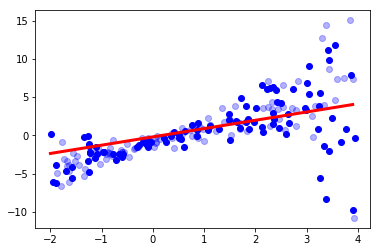

In [83]:
## Let's visualize the predicitions

x_arr = np.arange(-2,4,0.1)

g2 = tf.Graph()

with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph('./trained-model.meta')
    new_saver.restore(sess, './trained-model')
    
    y_pred  = sess.run('y_hat:0', feed_dict={'input_X:0': x_arr})
    
plt.figure()
plt.plot(X_train, y_train, 'bo')
plt.plot(X_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_pred.T[:,0], '-r', lw=3)

    
    


__Saving and restoring a model__ is very often used during the traiing stage of large models as well. Since the training stage of large models can take several hours to days, we can break the training phase inot smaller tasks. For example, if the intended number of epochs is 100 we can break it inot 25 task, where each task would run four epochs one after the other. For this purpose, we can save the trained model and restore it in the next task.

##### Transforming Tensors as multidimensional data arrays

- We explore a selection of operators that can be used to transofrm tensors. Note that some of these operators work very similar to NumPy array transformations. However, when we are dealing with tensors with ranks higher than 2, we need to be careful in using such transformations, for example, the transpose off a tensor.

In NumPy, we can use the attribute arr.shape to get the shape of a NumPy array. In TensorFlow, we use the tf.get_shape function instead

In [103]:
g = tf.Graph()
with g.as_default():
    arr = np.array([[1., 2., 3., 3.5],
                   [4., 5., 6., 6.5],
                   [7., 8., 9., 9.5]])
    T1 = tf.constant(arr, name='T1')
    print(T1)
    s = T1.get_shape()
    print('Shape of T1 is ', s)
    
    T2 = tf.Variable(tf.random_normal(shape=s))
    print(T2)
    
    T3 = tf.Variable(tf.random_normal(shape=(s.as_list()[0], )))
    print(T3)

Tensor("T1:0", shape=(3, 4), dtype=float64)
Shape of T1 is  (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32_ref>


Notice that we used s to create T2, but we cannot slice or index s for createing T3. Therefore, we convereted s into a regular Python list by s.as_list() and then used the usual indexing conventions.

__Reshape__ In Numpy, we can use np.reshape or arr.reshpae for this purpose. In TensorFflow, we use the function tf.reshape to reshape a tensor.

In [104]:
with g.as_default():
    T4 = tf.reshape(T1, shape= [1, 1, -1])
    print(T4)
    
    T5 = tf.reshape(T1, shape=[1,3, -1])
    print(T5)

Tensor("Reshape:0", shape=(1, 1, 12), dtype=float64)
Tensor("Reshape_1:0", shape=(1, 3, 4), dtype=float64)


In [105]:
with tf.Session(graph=g) as sess:
    print(sess.run(T4))
    print()
    print(sess.run(T5))

[[[ 1.   2.   3.   3.5  4.   5.   6.   6.5  7.   8.   9.   9.5]]]

[[[ 1.   2.   3.   3.5]
  [ 4.   5.   6.   6.5]
  [ 7.   8.   9.   9.5]]]


__Transpose:__ In Numpy : arr.T, arr.transpose() and np.transpose(arr). In TensorFlow , we use the tf.transpose funciton instead, and in addition to a regular transpose operation, we can change the order of dimensions in any way we want by specifying the oper in perm=[...],

In [106]:
with g.as_default():
    T6 = tf.transpose(T5, perm=[2,1,0], name='T6')
    print(T6)
    
    T7 = tf.transpose(T5, perm=[0,2,1], name='T7')
    print(T7)

Tensor("T6:0", shape=(4, 3, 1), dtype=float64)
Tensor("T7:0", shape=(1, 4, 3), dtype=float64)


__Split __ Next, we can also split a tensor into a list of subtensors using the tf.split funciton, 

In [107]:
with g.as_default():
    t5_splt = tf.split(T5, num_or_size_splits=2, axis=2, name='T8')
    print(t5_splt)

[<tf.Tensor 'T8:0' shape=(1, 3, 2) dtype=float64>, <tf.Tensor 'T8:1' shape=(1, 3, 2) dtype=float64>]


Here, it's important to note that the output is not a tensorr object anymore ; rather it's a lsit of tensor. The name of these subtensors are 'T8:0' and 'T8:1'

__ Concatenation__ Another useful transfromation is the concatenation of multiple tensors. If we have a lsi of tesnors with the same shape and _dtype_ we can combine them into one big tensor using the _tf.concat_ function.

In [110]:
g = tf.Graph()

with g.as_default():
    t1 = tf.ones(shape=[10,1], dtype=tf.float32, name='t1')
    t2 = tf.zeros(shape=[10,1], dtype=tf.float32, name='t2')    
    
    print(t1)
    print(t2)
    
with g.as_default():
    t3 = tf.concat([t1,t2], axis=0, name='t3')
    print(t3)
    t4 = tf.concat([t1,t2], axis=1, name='t4')    
    print(t4)

Tensor("t1:0", shape=(10, 1), dtype=float32)
Tensor("t2:0", shape=(10, 1), dtype=float32)
Tensor("t3:0", shape=(20, 1), dtype=float32)
Tensor("t4:0", shape=(10, 2), dtype=float32)


In [111]:
with tf.Session(graph=g) as sess:
    print(t3.eval())
    print()
    print(t4.eval())
    

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]


## Control flow mechanics in building graphs

- TensorFlow provides a mechanism for making decisons when building a graph. However, there are some subtle differences when we use Pythong's contorl flow statements compared to TensorFlow's flow funcitons. when construtting computation graphs

In [115]:
## Using naive Python's if statement to build a graph that corresponds to the preceding equation:

x, y = 1.0, 2.0

g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32, shape=None, name='tf_x')
    tf_y = tf.placeholder(dtype=tf.float32, shape=None, name='tf_y')    
    
    if x < y:
        res = tf.add(tf_x, tf_y , name='result_add')
    else:
        res = tf.subtract(tf_x, tf_y , name='result_sub')
    print('Object : ', res)
    
with tf.Session(graph=g) as sess:
    print(' X < y % s - Result: ' %(x < y),
         res.eval(feed_dict= {'tf_x:0': x, 'tf_y:0':y}))
    x, y = 2.0 , 1.0
    print(' X < y % s - Result: ' %(x < y),
         res.eval(feed_dict= {'tf_x:0': x, 'tf_y:0':y}))

Object :  Tensor("result_add:0", dtype=float32)
 X < y True - Result:  3.0
 X < y False - Result:  3.0


We can see, the _res_ object is a tensor named 'result_add:0'. It is very important to understand that in the previos mechanism , the computatio grpah has boly one brnacnh asoscaited iwth the additon operator, and the suntact operator has not been called.

The TensorFlow computation __graph is static. which menat that once the computation graph is built, it remains unchanged during the executiong process.__ so, even when we change the values of x and y and feed the new values to the graph, these new tensors will go trhought he same path in the graph. Therefore, in bothe cases, we see the same ouptut 3.0 for x=2, y=1, and for x =1, y=2

In [117]:
## Let's use the control flow mechnaics in TensorFlow.


x, y = 1.0, 2.0

g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32, shape=None, name='tf_x')
    tf_y = tf.placeholder(dtype=tf.float32, shape=None, name='tf_y')    
    
    res = tf.cond(tf_x < tf_y, 
        lambda: tf.add(tf_x, tf_y , name='result_add'),
        lambda: tf.subtract(tf_x, tf_y , name='result_sub'))
    print('Object : ', res)
    
with tf.Session(graph=g) as sess:
    print(' X < y % s - Result: ' %(x < y),
         res.eval(feed_dict= {'tf_x:0': x, 'tf_y:0':y}))
    x, y = 2.0 , 1.0
    print(' X < y % s - Result: ' %(x < y),
         res.eval(feed_dict= {'tf_x:0': x, 'tf_y:0':y}))

Object :  Tensor("cond/Merge:0", dtype=float32)
 X < y True - Result:  3.0
 X < y False - Result:  1.0


Here, we can see that the res object is name "cond/Merge:0" . In this case, the computation graph has two branches with a mechanism to decide which branch to follow at execution time. Therefore, when x-2m y=1, it follows thd addition branch and the ouptut will be 3.0 while for x=1, y-2 , the subtracitn branch is pursued and the result will be 1.0

In addition, to _tf.cond_ TensorFlwo offfers wevral other conrol flow operators, such as _ tf.case _ and tf.while_loop . For instnace, _ tf.case _ is the TensorFlow contorl flow equivlaent to a python if..else statement 

In [ ]:
if x < y :
    result = 1
else:
    result = 0
# Teh tf.case equivalne is;

f1 = lambda: tf.constant(1)
f2 = lambda: tf.constant(0)

result = tf.cond([(tf.less(x,y), f1)], default=f2)

In [ ]:
# Similary we can add a while loop to a TensorFlow graph that increments the i variable by 1 until a threshold
# vlaue is reached

i = tf.constant(0)
threshold = 100
c = lambda i: tf.less(i, 100)
b = lambda i: tf.add(i, 1) 
r = tf.while_loop(cond=c, body=b, loop_vars=[i])

## Visualizing the graph with TensorBoard

- Great feature of TensorFlow is TensorBoard, which is a module for visualizing he graph as weel as visualizing the learning of a model. Visualizng the graph allows s to see the connection between nodes, eplore their dependencies and debug the model if needed.


In [118]:
## Let's visualize the graph  we build before.

batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape= (batch_size, 100), dtype=tf.float32, name='tf_X')

    ## build the geneartor
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)    
        
    ## build the classifier
    with tf.variable_scope('classifier') as scope:
        ## classifier for the original data
        cls_out1 = build_classifier(data = tf_X, labels=tf.ones(shape=batch_size))
        
        
        ## reuse the classifier for generated data
        scope.reuse_variables()
        cls_out2 = build_classifier(data= gen_out1[1], labels=tf.zeros(shape=batch_size))

Note that no changes were needed so far for building the graph. So after building the graph, its visualization is tragiht forward. the following lines of code export the graph for visualization pruposesL


In [120]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    filt_writer = tf.summary.FileWriter(logdir='./logs/', graph=g)

This will create a new directory: logs/. Now we just need to run the following command in a Linux terminal

In [122]:
! tensorboard --logdir logs/

TensorBoard 0.1.5 at http://amit-Lenovo-G570:6006 (Press CTRL+C to quit) ^C



The above command will print a message, which is a URL address. We can launch Tensorboard by copying the link generated from the execution of above command.